In [105]:
# I aim to scrape catalog pictures of throw pillows from Overstock
# filters: "solid color", "Square" or "rectangular", " Accent" pillows
# url is "https://www.overstock.com/Home-Garden/Throw-Pillows/Solid-Color,Rectangle~Square,Accent,
# /pattern,pillow-shape,pillow-type,/2011/subcat.html?page=2"  
# where page ranges between 1 to 32
# credit to "https://medium.com/the-andela-way/introduction-to-web-scraping-using-selenium-7ec377a8cf72"
# credit to "https://intoli.com/blog/running-selenium-with-headless-chrome/"
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time
import os
import pandas as pd

In [106]:
# Launch your browser
options = webdriver.ChromeOptions()

# Initialize the driver
driver = webdriver.Chrome(options = options)

# experiment with page 1
page = 1
url_prefix = 'https://www.overstock.com/Home-Garden/Throw-Pillows/Solid-Color,Rectangle~Square,Accent,/pattern,pillow-shape,pillow-type,/2011/subcat.html?page='
url = url_prefix + str(page)
driver.get(url)

# wait up to 60 sec for the elements to become available
driver.implicitly_wait(60)

In [108]:
height = driver.execute_script("return document.documentElement.scrollHeight")
scrolls = int(height/1080)

# scroll window step by step
for i in range(scrolls+3):
    driver.execute_script("window.scrollBy(0, 1080/4*i)") 
    time.sleep(2)
 

In [98]:
# find_elements_by_xpath returns an array of selenium objects
img_url_element=driver.find_elements_by_xpath("//img[@class='productCardFrontImage']")

# use list comprehension to get the actual palette titles and not the selenium objects
img_url = [x.get_attribute('src') for x in img_url_element]

# print out all the titles
print ('image urls:')
print ( img_url, '\n')
print (len(img_url))

image urls:
['https://ak1.ostkcdn.com/images/products/9412909/L16600539.jpg?imwidth=480&impolicy=medium', 'https://ak1.ostkcdn.com/images/products/13218518/L19936654.jpg?imwidth=480&impolicy=medium', 'https://ak1.ostkcdn.com/images/products/8816874/L16050950.jpg?imwidth=480&impolicy=medium', 'https://ak1.ostkcdn.com/images/products/8817153/L16051170.jpg?imwidth=480&impolicy=medium', 'https://ak1.ostkcdn.com/images/products/10694023/L17755976.jpg?imwidth=480&impolicy=medium', 'https://ak1.ostkcdn.com/images/products/11381991/L18350445.jpg?imwidth=480&impolicy=medium', 'https://ak1.ostkcdn.com/images/products/6624571/L14191181.jpg?imwidth=480&impolicy=medium', 'https://ak1.ostkcdn.com/images/products/25776704/L31070776.jpg?imwidth=480&impolicy=medium', 'https://ak1.ostkcdn.com/images/products/9937110/L17092429.jpg?imwidth=480&impolicy=medium', 'https://ak1.ostkcdn.com/images/products/12038041/L18909705.jpg?imwidth=480&impolicy=medium', 'https://ak1.ostkcdn.com/images/products/10438315/L1

In [99]:
# find_elements_by_xpath returns an array of selenium objects
wishlist_element=driver.find_elements_by_xpath("//div[@class='wishlistCount']")

# use list comprehension to get the actual palette titles and not the selenium objects
wishlist = [x.text for x in wishlist_element]

# print out all the wishlist counts
print ('wishlist counts:')
print ( wishlist, '\n')
print (len(wishlist))

wishlist counts:
['7.8K', '3.4K', '687', '774', '2.7K', '1.4K', '1K', '96', '173', '3K', '1.3K', '1.1K', '875', '2.3K', '552', '891', '61', '306', '249', '55', '117', '733', '45', '157', '126', '51', '1.1K', '43', '75', '283', '2.5K', '41', '360', '463', '554', '1.6K', '37', '577', '182', '141', '594', '580', '757', '456', '74', '81', '500', '51', '428', '617', '427', '1K', '1.7K', '172', '1.2K', '254', '479', '1.5K', '237', '203'] 

60


In [158]:
def OS_scraping(PageNumber) :
    
    # Launch your browser
    options = webdriver.ChromeOptions()
    
    # Initialize the driver and open the url
    driver = webdriver.Chrome(options = options)
    
    url_prefix = 'https://www.overstock.com/Home-Garden/Throw-Pillows/Solid-Color,Rectangle~Square,Accent,/pattern,pillow-shape,pillow-type,/2011/subcat.html?page='
    url = url_prefix + str(PageNumber)
    driver.get(url)

    # wait up to 60 sec for the elements to become available
    driver.implicitly_wait(60)   
    # prevent loading images
    # prefs = {'profile.managed_default_content_settings.images':2}
    # options.add_experimental_option("prefs", prefs)
    
    # scroll window step by step
    height = driver.execute_script("return document.documentElement.scrollHeight")
    scrolls = int(height/1080)
    for i in range(scrolls+3):
        driver.execute_script("window.scrollBy(0, 1080/5*i)") 
        time.sleep(0.5)
    
    time.sleep(1)
    # find_elements_by_xpath returns an array of selenium objects
    img_url_element=driver.find_elements_by_xpath("//img[@class='productCardFrontImage']")

    # use list comprehension to get the actual palette titles and not the selenium objects
    img_url = [x.get_attribute('src') for x in img_url_element]
    
    # find_elements_by_xpath returns an array of selenium objects
    # wishlist_element=driver.find_elements_by_xpath("//div[@class='wishlistCount']")

    # use list comprehension to get the actual palette titles and not the selenium objects
    # wishlist = [x.text for x in wishlist_element]
    
    # close the window after a scratch 
    driver.close()
    
    Page = pd.Series(['Page_'+ str(PageNumber) + '_']).repeat(len(img_url))
    Seq = pd.Series(range(1,len(img_url)+1)).apply(str)
    ind = Page.str.cat(Seq.values)
    
    zipped_list = list(zip(img_url,ind))
    output = pd.DataFrame(zipped_list, columns = ['url','index'])
    
    return output

In [159]:
# scrape through page 1-32
# first, initiate data with page 1; lists taken from the trial run above
pd_data = OS_scraping(PageNumber = 1)
print (pd_data.shape)

(60, 2)


In [160]:
for i in range (2,33):
    pd_data = pd_data.append(OS_scraping(PageNumber=i))
    time.sleep(5)
print (pd_data.shape)

(1879, 2)


In [161]:
dir = os.getcwd ()
export_csv = pd_data.to_csv( os.path.join (dir, r'image_url_061119update6th.csv'), index = True, header = True)

In [162]:
# detected duplicate rows and remove from pd_data
pd_data_unique = pd_data.drop_duplicates()
print (pd_data_unique.shape)

(1879, 2)


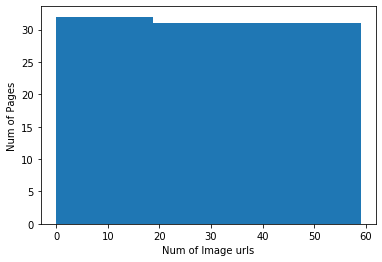

In [163]:
import matplotlib.pyplot as plt
plt.hist(pd_data.index.values, bins=60)
plt.ylabel('Num of Pages')
plt.xlabel('Num of Image urls')
plt.show()

In [145]:
plt.clf()

<Figure size 432x288 with 0 Axes>

Pulled all 1879 image urls;
Initially was adding waitlist counts, however when count =0 that data is lost during zip(list, list)
For now leave waitlist out but may come back later.